In [115]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1]

In [116]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [117]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [118]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [119]:
df.MedInc.value_counts().sort_values(ascending=False)

MedInc
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
2.0571      1
2.5721      1
2.9430      1
3.1462      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [120]:
df.MedInc.mode()

0     3.1250
1    15.0001
Name: MedInc, dtype: float64

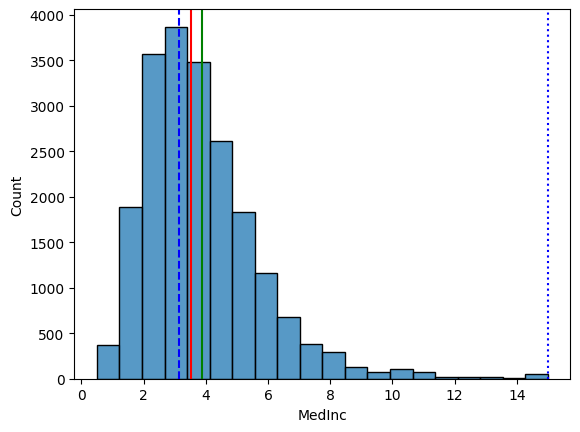

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.MedInc, bins=20)

plt.axvline(df.MedInc.mean(), c='g')
plt.axvline(df.MedInc.median(), c='r')

plt.axvline(df.MedInc.mode()[0], c='b', ls='--')
plt.axvline(df.MedInc.mode()[1], c='b', ls=':')

In [122]:
df.HouseAge.value_counts().sort_values(ascending=False)

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

MedInc 0.3358710029069769
HouseAge 0.07210271317829467


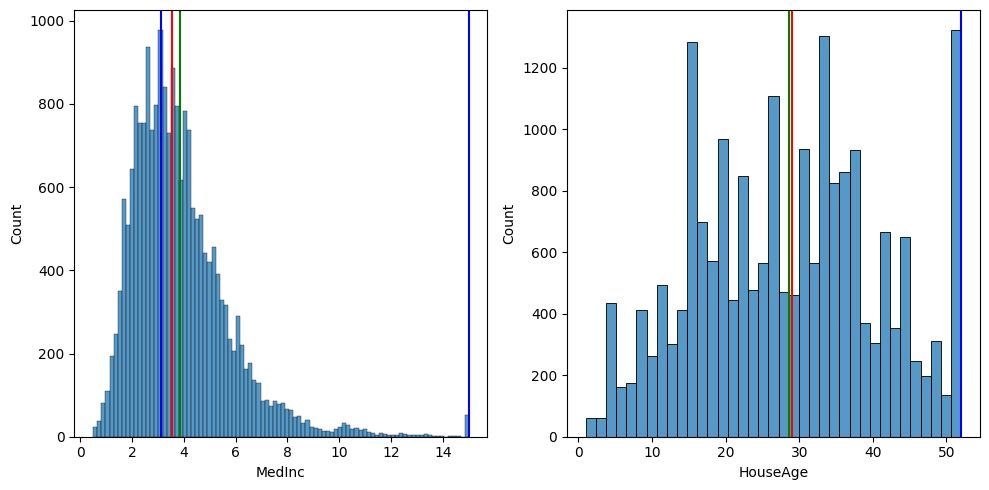

In [123]:
a, b = 1, 2
fig, ax = plt.subplots(a, b)
fig.set_size_inches((10, 5))

cols = ['MedInc', 'HouseAge']
for column, id in zip(cols, range(len(cols))):
    sns.histplot(ax=ax[id], x=column, data=df, stat='count', legend=None)

    ax[id].axvline(df[column].mean(), c='g')
    ax[id].axvline(df[column].median(), c='r')

    for mode in df[column].mode():
        ax[id].axvline(mode, c='b')

    if id == 0:
        print(column, abs(df[column].mean() - df[column].median()))
    else:
        print(column, abs(df[column].mean() - df[column].median()) / 5)

plt.tight_layout()

1.4512499999999997

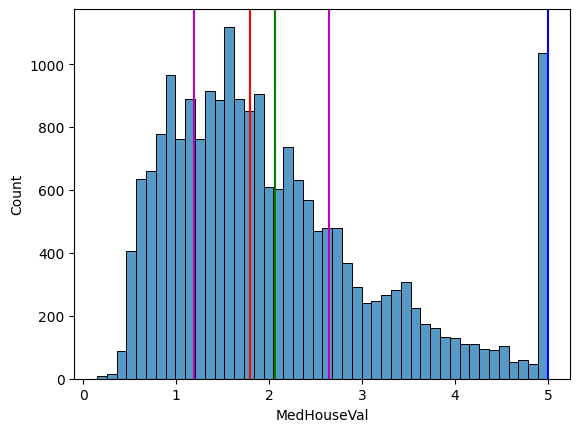

In [124]:
sns.histplot(target)
plt.axvline(target.mean(), c='g')
plt.axvline(target.median(), c='r')
plt.axvline(target.mode()[0], c='b')

plt.axvline(target.quantile(0.25), c='m')
plt.axvline(target.quantile(0.75), c='m')

target.quantile(0.75) - target.quantile(0.25)

In [125]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [111]:
scaled_df = (df - df.mean()) / df.std(ddof=1)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785
...,...,...,...,...,...,...,...,...
20635,-1.216099,-0.289180,-0.155020,0.077352,-0.512579,-0.049109,1.801603,-0.758808
20636,-0.691576,-0.845373,0.276874,0.462353,-0.944382,0.005021,1.806285,-0.818702
20637,-1.142566,-0.924829,-0.090316,0.049413,-0.369528,-0.071733,1.778194,-0.823693
20638,-1.054557,-0.845373,-0.040210,0.158774,-0.604415,-0.091223,1.778194,-0.873605


In [133]:
pd.concat([scaled_df.corrwith(target, method='pearson').rename('Pearson'),
           scaled_df.corrwith(target, method='spearman').rename('Spearman'),
           scaled_df.corrwith(target, method='kendall').rename('Kendall')],
          axis=1)

,Pearson,Spearman,Kendall
MedInc,0.688075,0.676778,0.495528
HouseAge,0.105623,0.074855,0.049822
AveRooms,0.151948,0.263367,0.179175
AveBedrms,-0.046701,-0.125187,-0.083489
Population,-0.024650,0.003839,0.002172
AveOccup,-0.023737,-0.256594,-0.174370
Latitude,-0.144160,-0.165739,-0.109411
Longitude,-0.045967,-0.069667,-0.052495


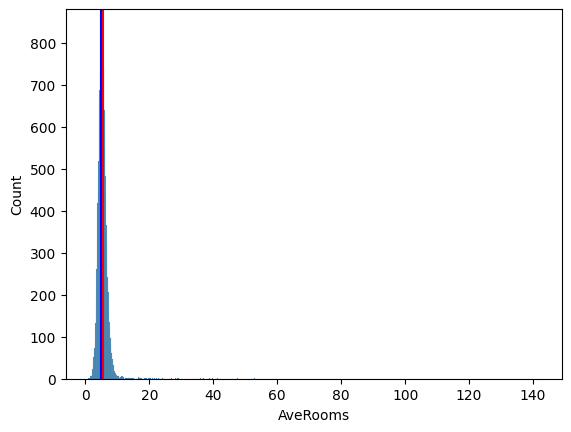

In [146]:
sns.histplot(df['AveRooms'])
plt.axvline(df['AveRooms'].mean(), c='g')
plt.axvline(df['AveRooms'].median(), c='r')
plt.axvline(df['AveRooms'].mode()[0], c='b')

<Axes: xlabel='AveRooms', ylabel='Count'>

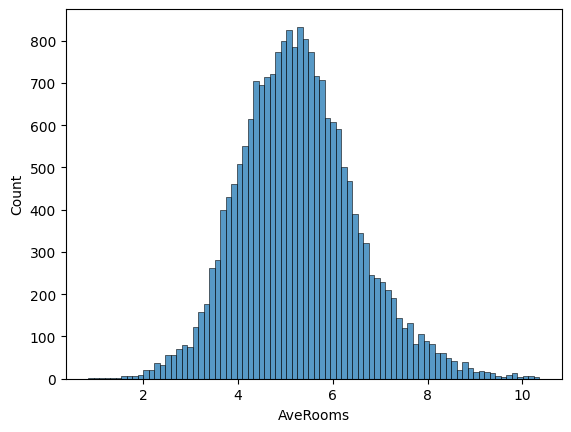

In [152]:
sns.histplot(df['AveRooms'][df['AveRooms'] < df['AveRooms'].quantile(0.99)])

,Corr
Pearson,0.327759
Spearman,0.274793
Kendall,0.186279


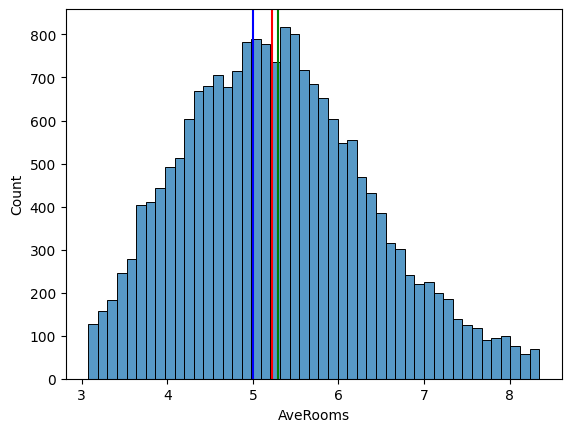

In [168]:
ave_rooms = df['AveRooms'][(df['AveRooms'] < df['AveRooms'].quantile(0.975)) &
                           (df['AveRooms'] > df['AveRooms'].quantile(0.025))]
sns.histplot(ave_rooms)
plt.axvline(ave_rooms.mean(), c='g')
plt.axvline(ave_rooms.median(), c='r')
plt.axvline(ave_rooms.mode()[0], c='b')


pd.DataFrame([ave_rooms.corr(target, method='pearson'),
              ave_rooms.corr(target, method='spearman'),
              ave_rooms.corr(target, method='kendall')],
             index=['Pearson', 'Spearman', 'Kendall'],
             columns=['Corr'])

<Axes: >

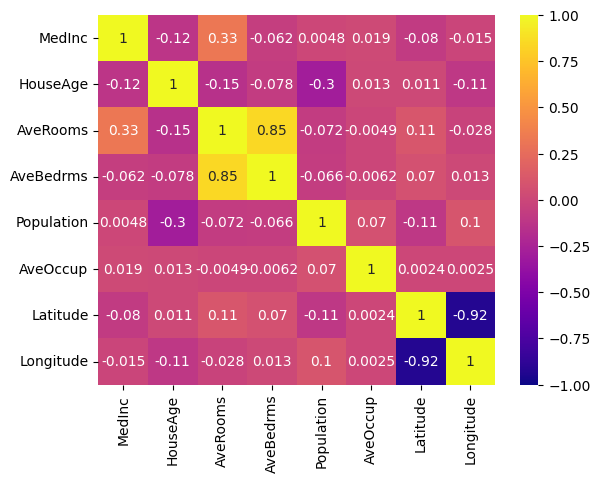

In [172]:
sns.heatmap(df.corr(method='pearson'),vmin=-1, vmax=1, center=0, cmap='plasma', annot=True)